## Observations and Insights

## Dependencies and starter code

In [369]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [419]:
print(f"A few Conclusions from the data:")
print(f"Capomulin shows promise as trials indicated tumor size shrunk steadily over time for mice treated with this regimen.")
print(f"Capomulin along with Ramicane had the fewest outliers of the promising drugs, meaning they are consistently achieving results.")
print(f"The mice used in the study were a nearly perfect split of male and female, which should show accurate efficacy of the drugs across both genders.")

A few Conclusions from the data:
Capomulin shows promise as trials indicated tumor size shrunk steadily over time for mice treated with this regimen.
Capomulin along with Ramicane had the fewest outliers of the promising drugs, meaning they are consistently achieving results.
The mice used in the study were a nearly perfect split of male and female, which should show accurate efficacy of the drugs across both genders.


## Summary statistics

In [370]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [371]:
#looking at data to see column names etc.
#mouse_metadata
#study_results

In [372]:
#merge the two data frames
combined_results = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [373]:
#use .agg to generate a summary data table for mean, median, var, std, and sem of tumor volume
summary_pd = combined_results.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':["mean","median","var","std","sem"]})
summary_pd

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

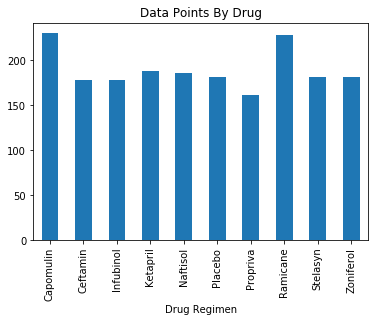

In [385]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
combined_results
data_points = combined_results.groupby(['Drug Regimen'])['Mouse ID'].count()
#plot the chart
data_points.plot.bar()

# Set a title for the plot
plt.title("Data Points By Drug")
#shot the plot
plt.show()


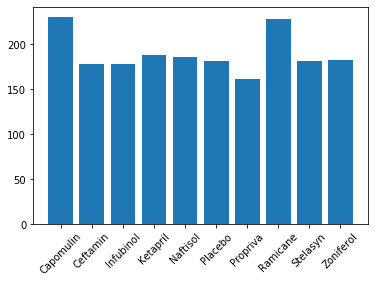

In [409]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#create a list of the drugs for tick labels
drug_count = combined_results['Drug Regimen'].unique()
#drug_count
#make a list of the data points for count of data points for each drug
data_points = combined_results.groupby(['Drug Regimen']).count()
data = data_points['Mouse ID']
#make a list of the data points
data = data.values.tolist()
#check the list and df
#data
#data_points.head(10)
#set x axis
x_axis = np.arange(len(drug_count))

#make a variable for the x labels by sorting the list of drugs
drug_labels = sorted(drug_count)
#plot the chart
plt.bar(x_axis,data)
#add the tick values and label them with the drugs
plt.xticks(x_axis, drug_labels, rotation=45)
plt.show()

## Pie plots

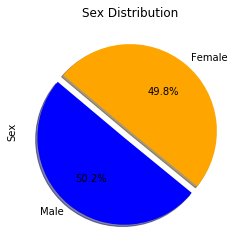

In [376]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#calculate the sex distribution by taking sex from unique mouse IDs
male_mice = combined_results[combined_results['Sex'] == 'Male'].nunique()['Mouse ID']
female_mice = combined_results[combined_results['Sex'] == 'Female'].nunique()['Mouse ID']
#Create a new dataframe to house the results
mouse_sex_distribution = pd.DataFrame({'Sex': [male_mice,female_mice]}, index=['Male','Female'])
#plot the results
mouse_sex_distribution = mouse_sex_distribution['Sex']
# Labels for the sections of our pie chart
labels = ["Male","Female"]
# Input the values of each section of the pie chart from the calculations above
values = [125,124]
# The colors of each section of the pie chart
colors = ["blue", "orange"]
# Explode the Male section
explode = (0.1, 0)
#add a title
plt.title('Sex Distribution')
#build the chart
mouse_sex_distribution.plot(kind="pie",explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

([<matplotlib.patches.Wedge at 0x1a8094a3c48>,
 [Text(-0.7655308193487089, -0.9241009493704109, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.44655964462008013, -0.5390588871327396, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

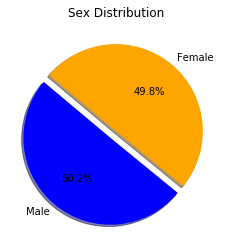

In [388]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male","Female"]
# Input the values of each section of the pie chart from the calculations above
values = [125,124]
# The colors of each section of the pie chart
colors = ["blue", "orange"]
# Explode the Male section
explode = (0.1, 0)
#Title the plot
plt.title("Sex Distribution")
#plot the chart
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

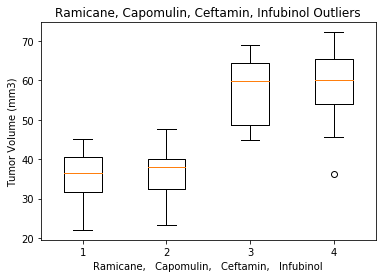

The interquartile ranges of Tumor Volume are: Ramicane: 9.1, Capomulin: 7.78, Ceftamin: 15.58 Infubinol: 11.48
Values below Ramicane: 17.91, Capomulin: 20.7, Ceftamin: 25.36, Infubinol: 36.83 are potentially outliers.
Values above Ramicane: 54.31, Capomulin: 51.83, Ceftamin: 87.67, Infubinol: 82.74 are potentially outliers.


In [414]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Sort by Timpepoints based on the combined data
#and drop duplicates, keeping first value, should be the latest timepoint per mouse
timepoint_last = combined_results.sort_values(by=['Timepoint'], ascending=False).drop_duplicates('Mouse ID', keep='first')

#sort by tumor volume
timepoint_last = timepoint_last.sort_values(by='Tumor Volume (mm3)', ascending = False)


# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
indexed_results = timepoint_last.set_index('Drug Regimen')
#get data for each drug Rammicane, Capomulin, Ceftamin, Infubinol
ramicane = indexed_results.filter(like='Ramicane', axis=0)
ramicane = ramicane['Tumor Volume (mm3)']

capomulin = indexed_results.filter(like='Capomulin', axis=0)
capomulin = capomulin['Tumor Volume (mm3)']

ceftamin = indexed_results.filter(like='Ceftamin', axis=0)
ceftamin = ceftamin['Tumor Volume (mm3)']

infubinol = indexed_results.filter(like='Infubinol', axis=0)
infubinol = infubinol['Tumor Volume (mm3)']

data = [ramicane,capomulin,ceftamin, infubinol]

fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane, Capomulin, Ceftamin, Infubinol Outliers')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Ramicane,   Capomulin,   Ceftamin,   Infubinol')

ax1.boxplot(data)
plt.show()
#Determine IQR and calculate quartiles for each drug
ramicane_quartiles = ramicane.quantile([.25,.5,.75])
lowerqr = ramicane_quartiles[0.25]
upperqr = ramicane_quartiles[0.75]
iqrr = upperqr-lowerqr
lower_boundr = lowerqr - (1.5*iqrr)
upper_boundr = upperqr + (1.5*iqrr)

capomulin_quartiles = capomulin.quantile([.25,.5,.75])
lowerqc1 = capomulin_quartiles[0.25]
upperqc1 = capomulin_quartiles[0.75]
iqrc1 = upperqc1-lowerqc1
lower_boundc1 = lowerqc1 - (1.5*iqrc1)
upper_boundc1 = upperqc1 + (1.5*iqrc1)

ceftamin_quartiles = ceftamin.quantile([.25,.5,.75])
lowerqc2 = ceftamin_quartiles[0.25]
upperqc2 = ceftamin_quartiles[0.75]
iqrc2 = upperqc2-lowerqc2
lower_boundc2 = lowerqc2 - (1.5*iqrc2)
upper_boundc2 = upperqc2 + (1.5*iqrc2)

infubinol_quartiles = infubinol.quantile([.25,.5,.75])
lowerqi = infubinol_quartiles[0.25]
upperqi = infubinol_quartiles[0.75]
iqri = upperqi-lowerqi
lower_boundi = lowerqi - (1.5*iqri)
upper_boundi = upperqi + (1.5*iqri)

print(f"The interquartile ranges of Tumor Volume are: Ramicane: {round(iqrr,2)}, Capomulin: {round(iqrc1,2)}, Ceftamin: {round(iqrc2,2)} Infubinol: {round(iqri,2)}")

print(f"Values below Ramicane: {round(lower_boundr,2)}, Capomulin: {round(lower_boundc1,2)}, Ceftamin: {round(lower_boundc2,2)}, Infubinol: {round(lower_boundi,2)} are potentially outliers.")
print(f"Values above Ramicane: {round(upper_boundr,2)}, Capomulin: {round(upper_boundc1,2)}, Ceftamin: {round(upper_boundc2,2)}, Infubinol: {round(upper_boundi,2)} are potentially outliers.")

## Line and scatter plots

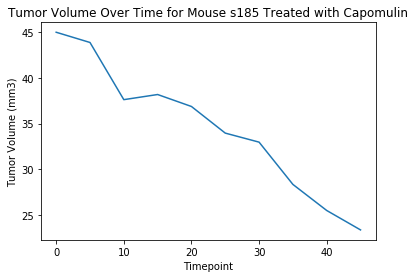

In [404]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#find a unique mouse id treated with Capomulin
#combined_results.groupby('Drug Regimen')["Mouse ID"].unique()
index_df = combined_results.set_index('Drug Regimen')
capomulin_df = index_df.loc["Capomulin", "Mouse ID":"Tumor Volume (mm3)"]
#found mouse s185
#generate a df for just one mouse
capomulin_s185 = capomulin_df[capomulin_df['Mouse ID'] == 's185']
capomulin_s185
#take data for s185
time = capomulin_s185['Timepoint'].tolist()
tumor_volume = capomulin_s185['Tumor Volume (mm3)'].tolist()
#plot the chart
plt.plot(time, tumor_volume)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse s185 Treated with Capomulin")
plt.show()


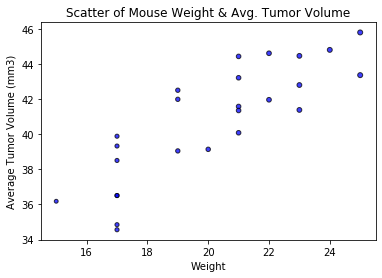

In [382]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = combined_results.set_index('Drug Regimen').loc["Capomulin",:]
#group data by mouse ID
mouse_grouped = capomulin_df.groupby('Mouse ID')
#create data frames for weight and average volume (weight did not change across timepoint so using unique worked here)
capomulin_avg = pd.DataFrame(mouse_grouped['Tumor Volume (mm3)'].mean())
capomulin_weight = pd.DataFrame(mouse_grouped['Weight (g)'].unique())

#convert the df columns to series
avg_tumor = capomulin_avg['Tumor Volume (mm3)'].to_list()
weight = capomulin_weight['Weight (g)'].to_list()
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Scatter of Mouse Weight & Avg. Tumor Volume')
plt.scatter(weight, avg_tumor, marker='o', facecolors='blue',edgecolors='black', s=weight, alpha=0.75)

In [383]:
# Calculate the correlation coefficient 
#and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

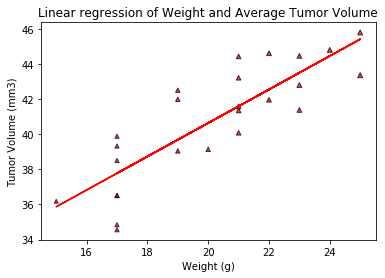

The correlation coefficient is 0.841936


In [413]:
#take values from capomulin from main data set
capomulin_df = combined_results.set_index('Drug Regimen').loc["Capomulin",:]
#group by unique mouse ID and take the mean of the dataset
cap_grouped = capomulin_df.groupby('Mouse ID').mean()
#set x and y values for scatter plot and linear regression
x_values = cap_grouped['Weight (g)']
y_values= cap_grouped['Tumor Volume (mm3)']


#plot the scatter plot
plt.scatter(x_values, y_values, marker='^', facecolors='red',edgecolors='black', s=weight, alpha=0.75)

#find linear regression values for slope intercept rvalue pvalue and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#set regress values to mx+b
regress_values = x_values * slope + intercept
#plot the regression line
plt.plot(x_values,regress_values,"r-")

#label the table
plt.title('Linear regression of Weight and Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()
cc_lib = {'Weight': mouse_grouped['Weight (g)'], 'Avg Volume': mouse_grouped['Tumor Volume (mm3)']}
cc_df = pd.DataFrame(cc_lib)
#cc_df = cc_df.corr(method='pearson')
cc_df.corr(method='pearson')
#hard coded this from the above correlation df 
print(f"The correlation coefficient is 0.841936")